In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tqdm.auto import tqdm
from timeit import default_timer as timer
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("max_columns",100)

In [2]:
from twython import Twython

CONSUMER_KEY = "your consumer key"
CONSUMER_SECRET = "your consumer secret"

twitter = Twython(CONSUMER_KEY,CONSUMER_SECRET)

In [3]:
twitter

<Twython: h3CnmPWBTrjQkNHQX34MKnia9>

In [4]:
#dir(Twython)

In [5]:
#help(Twython).search

In [6]:
results = twitter.search(q ="emotion recognition", count = 100)

type(results)

dict

In [7]:
all_items = results["statuses"]
import pandas as pd

In [8]:
tweet_df = pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Tue Aug 30 14:08:48 +0000 2022,1564616126050586625,1564616126050586625,Great presentation from @DrMadgeJackson today ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1024260206937694208, 'id_str': '1024260...",None,None,"{'id': '55ea4e5e9bb75976', 'url': 'https://api...",None,False,0,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 30 13:30:31 +0000 2022,1564606494770872320,1564606494770872320,RT @nomandates23: @daniela127 Masking is horri...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1522955994447454210, 'id_str': '1522955...",None,None,None,None,False,11,0,False,False,NaN,en,{'created_at': 'Mon Aug 29 03:06:28 +0000 2022...,NaN,NaN,NaN,NaN
2,Tue Aug 30 13:06:54 +0000 2022,1564600551328841728,1564600551328841728,@crackedscience Same with the comparison to su...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.564600e+18,1564600261481472002,1.311352e+18,1311351519044870144,nostreetforthee,"{'id': 1311351519044870144, 'id_str': '1311351...",None,None,None,None,False,0,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Tue Aug 30 12:15:14 +0000 2022,1564587548550250497,1564587548550250497,RT @nomandates23: @daniela127 Masking is horri...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1520440494257491968, 'id_str': '1520440...",None,None,None,None,False,11,0,False,False,NaN,en,{'created_at': 'Mon Aug 29 03:06:28 +0000 2022...,NaN,NaN,NaN,NaN
4,Tue Aug 30 11:23:48 +0000 2022,1564574602776711169,1564574602776711169,RT @nomandates23: @daniela127 Masking is horri...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 835865042, 'id_str': '835865042', 'name...",None,None,None,None,False,11,0,False,False,NaN,en,{'created_at': 'Mon Aug 29 03:06:28 +0000 2022...,NaN,NaN,NaN,NaN


In [9]:
tweet_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_entities'],
      dtype='object')

In [10]:
tweet_user = pd.DataFrame([d["user"] for d in results["statuses"]])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1024260206937694208,1024260206937694208,Crystal Silver,CASilver,"Scotland, United Kingdom",Postgrad researcher in Social Agency 👥 @abdnps...,https://t.co/CnTODQdBDl,{'url': {'urls': [{'url': 'https://t.co/CnTODQ...,False,353,813,3,Tue Jul 31 11:47:17 +0000 2018,6273,None,None,True,False,1002,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1546575377...,https://pbs.twimg.com/profile_images/154657537...,https://pbs.twimg.com/profile_banners/10242602...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
1,1522955994447454210,1522955994447454210,richard dimeck,WHATTHEACTUAL80,,Meh,None,{'description': {'urls': []}},False,52,239,0,Sat May 07 15:06:50 +0000 2022,4542,None,None,False,False,5500,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1522956127...,https://pbs.twimg.com/profile_images/152295612...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
2,1311351519044870144,1311351519044870144,"here, or not",nostreetforthee,,I am 100% vaccinated and so are my kids. she,None,{'description': {'urls': []}},False,123,474,2,Wed Sep 30 17:05:49 +0000 2020,7092,None,None,False,False,3772,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1487135869...,https://pbs.twimg.com/profile_images/148713586...,https://pbs.twimg.com/profile_banners/13113515...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
3,1520440494257491968,1520440494257491968,PrairieBlessed,PrairieBlessed2,,,None,{'description': {'urls': []}},False,32,149,0,Sat Apr 30 16:30:50 +0000 2022,6955,None,None,False,False,2260,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1520440628...,https://pbs.twimg.com/profile_images/152044062...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
4,835865042,835865042,Nate Sonner ♠️📚🗨️☕️🥃🇵🇭,n8sonner,Dumaguete City,Christian Worldview Discipleship @CWD3D Follow...,https://t.co/2Sd7QszxxX,{'url': {'urls': [{'url': 'https://t.co/2Sd7Qs...,False,164,786,15,Thu Sep 20 16:06:03 +0000 2012,4905,None,None,False,False,6236,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,http://pbs.twimg.com/profile_images/1268855620...,https://pbs.twimg.com/profile_images/126885562...,https://pbs.twimg.com/profile_banners/83586504...,0DDEDB,000000,000000,000000,False,False,False,False,None,None,None,none,[]


In [11]:
twitter_df= tweet_df.merge(tweet_user, left_index= True, right_index = True)

In [12]:
twitter_df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang_x,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,id_y,id_str_y,name,screen_name,location,description,url,entities_y,protected,followers_count,friends_count,listed_count,created_at_y,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang_y,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Tue Aug 30 14:08:48 +0000 2022,1564616126050586625,1564616126050586625,Great presentation from @DrMadgeJackson today ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1024260206937694208, 'id_str': '1024260...",None,None,"{'id': '55ea4e5e9bb75976', 'url': 'https://api...",None,False,0,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN,1024260206937694208,1024260206937694208,Crystal Silver,CASilver,"Scotland, United Kingdom",Postgrad researcher in Social Agency 👥 @abdnps...,https://t.co/CnTODQdBDl,{'url': {'urls': [{'url': 'https://t.co/CnTODQ...,False,353,813,3,Tue Jul 31 11:47:17 +0000 2018,6273,None,None,True,False,1002,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1546575377...,https://pbs.twimg.com/profile_images/154657537...,https://pbs.twimg.com/profile_banners/10242602...,1DA1F2,C0DEED,DDEEF6,333333,True,False,True,False,None,None,None,none,[]
1,Tue Aug 30 13:30:31 +0000 2022,1564606494770872320,1564606494770872320,RT @nomandates23: @daniela127 Masking is horri...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1522955994447454210, 'id_str': '1522955...",None,None,None,None,False,11,0,False,False,NaN,en,{'created_at': 'Mon Aug 29 03:06:28 +0000 2022...,NaN,NaN,NaN,NaN,1522955994447454210,1522955994447454210,richard dimeck,WHATTHEACTUAL80,,Meh,None,{'description': {'urls': []}},False,52,239,0,Sat May 07 15:06:50 +0000 2022,4542,None,None,False,False,5500,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1522956127...,https://pbs.twimg.com/profile_images/152295612...,NaN,1DA1F2,C0DEED,DDEEF6,333333,True,True,True,False,None,None,None,none,[]
2,Tue Aug 30 13:06:54 +0000 2022,1564600551328841728,1564600551328841728,@crackedscience Same with the comparison to su...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.564600e+18,1564600261481472002,1.311352e+18,1311351519044870144,nostreetforthee,"{'id': 1311351519044870144, 'id_str': '1311351...",None,None,None,None,False,0,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN,1311351519044870144,1311351519044870144,"here, or not",nostreetforthee,,I am 100% vaccinated and so are my kids. she,None,{'description': {'urls': []}},False,123,474,2,Wed Sep 30 17:05:49 +0000 2020,7092,None,None,False,False,3772,None,False,False,False,F5F8FA,None,None,False,http://pbs.twimg.com/profile_images/1487135869...,https://pbs.twimg.com/profile_images/148713586...,https://pbs.twimg.com/profile_banners/13113515...,1DA1F2,C0DEED,DDEEF6,333333,True,Fals

In [13]:
twitter_df.columns

Index(['created_at_x', 'id_x', 'id_str_x', 'text', 'truncated', 'entities_x',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang_x', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_entities', 'id_y',
       'id_str_y', 'name', 'screen_name', 'location', 'description', 'url',
       'entities_y', 'protected', 'followers_count', 'friends_count',
       'listed_count', 'created_at_y', 'favourites_count', 'utc_offset',
       'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang_y',
       'contributors_enabled', 'is_translator', 'is_translation_enabled',
       'profile_background_color', 'profile_background_image_url',
       '

## Finding locations of most tweets

<AxesSubplot:>

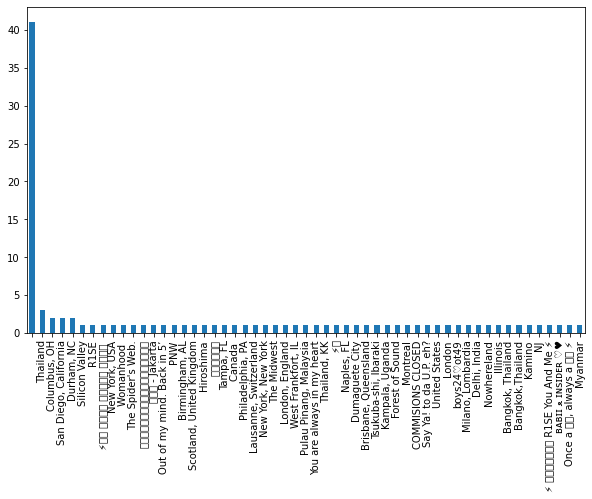

In [14]:
twitter_df.location.value_counts().plot(kind="bar", figsize= (10,6))

In [15]:
df = twitter_df["text"]
df = pd.DataFrame(df)
df

,text
0,Great presentation from @DrMadgeJackson today ...
1,RT @nomandates23: @daniela127 Masking is horri...
2,@crackedscience Same with the comparison to su...
3,RT @nomandates23: @daniela127 Masking is horri...
4,RT @nomandates23: @daniela127 Masking is horri...
...,...
95,Emotion recognition based on group phase locki...
96,RT @mileapo_support: There's no better Kinn th...
97,RT @mileapo_support: There's no better Kinn th...
98,RT @mileapo_support: There's no better Kinn th...


In [16]:
from textblob import TextBlob
import nltk
from nltk import word_tokenize
import string
import re
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from langdetect import detect

In [17]:
def data_cleaning(df):
    stop_words= list(stopwords.words("english"))
    df["language"] = df["text"].apply(lambda x: detect(x))
    df = df[df["language"]=="en"] 
    
    df["improved_text"] = df["text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df["improved_text"] = df["improved_text"].apply(lambda x: word_tokenize(x.lower()))
    df["improved_text"]= df["improved_text"].apply(lambda x: [word for word in x if word not in stop_words])
    df["improved_text"]= df["improved_text"].apply(lambda x: " ".join(x))
    df["improved_text"]= df["improved_text"].apply(lambda x: WordNetLemmatizer().lemmatize(x))
    df["sentiment_polarity"]= df["improved_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
    df["sentiment_subjectivity"]= df["improved_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    
    return df
    

In [18]:
df = data_cleaning(df)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
X_count = vect.fit_transform(df["improved_text"])
shape_X= X_count.shape
X_a = X_count.toarray()
X_a = np.reshape(X_a, shape_X)

In [20]:
columns = vect.get_feature_names()
df1 = pd.DataFrame(X_a, columns = columns)

In [21]:
first_10_words= df1.sum().sort_values(ascending=False)[0:10]

In [22]:
first_10_words

emotion        63
rt             57
recognition    55
thank          51
zhaorang       26
220828         26
youth          26
towards        26
shimo          26
selfies        26
dtype: int64

<AxesSubplot:>

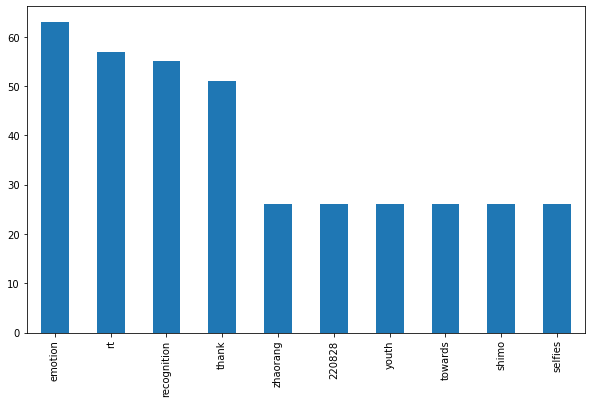

In [23]:
first_10_words.plot(kind="bar", figsize=(10,6))

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='sentiment_polarity', ylabel='count'>

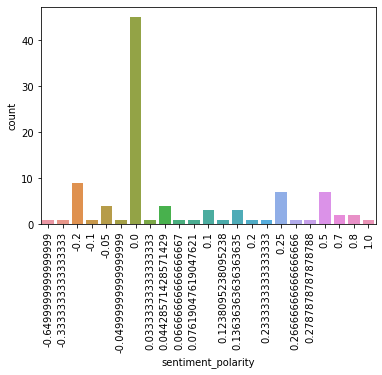

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
sns.countplot(x = df["sentiment_polarity"])

In [26]:
def tweet_sentence(score):
    if score > 0.2:
        return 1
    elif score < -0.2:
        return -1
    else:
        return 0
df["class"]= df["sentiment_polarity"].apply(tweet_sentence)

In [27]:
X, y = df["improved_text"], df["class"]

In [28]:
X_vectorized = vect.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, train_size=0.3, random_state=101) 

In [58]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [60]:
g= GaussianNB()
b= BernoulliNB()
k= KNeighborsClassifier()
log= LogisticRegression()
gbc= GradientBoostingClassifier()
r= RandomForestClassifier() 
d= DecisionTreeClassifier()

In [61]:
X_train, X_test= X_train.toarray(), X_test.toarray()

In [63]:
algorithms=[g,b,k,log,gbc,r,d]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','GradientBoosting','RandomForest','DecisionTree'] 
def algo_test (A,b,algorithms=algorithms,names=names):
    # fit the data 
    for i in tqdm(range(len(algorithms))):
        start = timer()
        print("training phase current algorithm:" + names[i])
        algorithms[i]=algorithms[i].fit(A,b)
        end = timer()
        print(names[i] + " time elapsed: %.2f s" % (end-start))
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    for i in range(len(algorithms)):
        start = timer()
        print("testing phase current algorithm:" + names[i])
        accuracy.append(accuracy_score(y_test,algorithms[i].predict(X_test)))
        precision.append(precision_score(y_test,algorithms[i].predict(X_test), average="micro"))
        recall.append(recall_score(y_test,algorithms[i].predict(X_test),average="micro"))
        f1.append(f1_score(y_test,algorithms[i].predict(X_test),average="micro"))
        end = timer()
        print(names[i] + " time elapsed: %.2f s" % (end-start))        
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy']=accuracy 
    metrics['Precision']=precision 
    metrics['Recall']=recall 
    metrics['F1']=f1
    return metrics.sort_values('F1',ascending=False)  

In [64]:
algo_test(X_train,y_train)

  0%|          | 0/7 [00:00<?, ?it/s]

training phase current algorithm:GaussianNB
GaussianNB time elapsed: 0.00 s
training phase current algorithm:BernoulliNB
BernoulliNB time elapsed: 0.00 s
training phase current algorithm:K Nearest
K Nearest time elapsed: 0.00 s
training phase current algorithm:Logistic
Logistic time elapsed: 0.01 s
training phase current algorithm:GradientBoosting
GradientBoosting time elapsed: 0.16 s
training phase current algorithm:RandomForest
RandomForest time elapsed: 0.10 s
training phase current algorithm:DecisionTree
DecisionTree time elapsed: 0.00 s
testing phase current algorithm:GaussianNB
GaussianNB time elapsed: 0.00 s
testing phase current algorithm:BernoulliNB
BernoulliNB time elapsed: 0.00 s
testing phase current algorithm:K Nearest
K Nearest time elapsed: 0.01 s
testing phase current algorithm:Logistic
Logistic time elapsed: 0.00 s
testing phase current algorithm:GradientBoosting
GradientBoosting time elapsed: 0.00 s
testing phase current algorithm:RandomForest
RandomForest time elapse

,Accuracy,Precision,Recall,F1
GaussianNB,0.857143,0.857143,0.857143,0.857143
Logistic,0.842857,0.842857,0.842857,0.842857
GradientBoosting,0.842857,0.842857,0.842857,0.842857
RandomForest,0.842857,0.842857,0.842857,0.842857
DecisionTree,0.828571,0.828571,0.828571,0.828571
K Nearest,0.814286,0.814286,0.814286,0.814286
BernoulliNB,0.757143,0.757143,0.757143,0.757143
